# GDP Percentage Based On Total Indusrty

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>

<font color=#303F9F>This part of the project for "Investigating Country GDP and Education" will focus on the total percentage of industry for each year 1960-2017. Choosing to investigage the top GDP/Capita countries above the mean.</font>
<p>
<li><font color=green>Luxembourg</li></font>
<li><font color=blue>Norway</li></font>
<li><font color=red>Denmark</li></font>
<li><font color=gold>Sweden</li></font>
<li><font color=#81D4FA>Australia</li></font>

<a id='wrangling'></a>
# Lets Do Some Wrangling and Oganizing. YEEEEEHaw

<font color=#303F9F>We start by importing all of our necessary libraries and the data we want to analyze "industry_percent_of_gdp.csv".</font>
<p>
<font color=#303F9F><li>Pandas to help us wrangle and organize our data</li></font>
<font color=#303F9F><li>Matplotlib to create beautiful visualizations</li></font>
<font color=#303F9F><li>Seaborn for visualization styling</li></font>
<font color=#303F9F><li>Numpy to help with scientific computing</li></font>


In [15]:
#Import Packages and read the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#Set Chartting Style
sns.set(style="whitegrid")

#Setting figure size for visuals
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6

#GDP Percent Idustry by county & year 1970-2017 
gdp_industry = pd.read_csv('industry_percent_of_gdp.csv')

#Viewing GDP Industry Data
gdp_industry.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.7,21.8,21.0,22.6,21.0,20.4,21.10,22.00,21.70,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.2,24.4,24.9,24.5,22.9,23.1,21.50,21.80,21.10,21.1
2,Algeria,29.4,29.5,31.7,40.8,42.7,42.2,46.5,47.8,47.7,...,58.6,47.9,50.5,49.6,47.8,44.3,42.30,35.70,34.90,36.3
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.5,14.4,13.5,12.4,11.0,10.3,9.91,9.78,9.84,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=#303F9F>You’ll notice the use of “.head()” quite extensively this is just for saving space.</font>

In [16]:
#Investigate the data 189 Row & 59 Columns
gdp_industry.shape

(189, 59)

In [17]:
#Investigate the data types we don't want an INT or Float to be a String.
gdp_industry.dtypes.head()

country     object
1960       float64
1961       float64
1962       float64
1963       float64
dtype: object

In [18]:
#Investigate null records
gdp_industry.isnull().sum().head()

country      0
1960       149
1961       147
1962       147
1963       145
dtype: int64

In [19]:
#Investigate duplicate records
gdp_industry.duplicated().sum()

0

In [20]:
#Investigate number of unique values in each column
gdp_industry.nunique().head()

country    189
1960        37
1961        39
1962        39
1963        42
dtype: int64

In [21]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.
gdp_industry.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,40.000000,42.000000,42.000000,44.000000,46.000000,64.000000,67.000000,68.000000,71.000000,72.000000,...,183.000000,182.000000,182.000000,182.000000,182.000000,184.000000,183.000000,180.000000,172.000000,143.000000
mean,21.634750,21.168333,21.495952,21.726364,22.810000,23.162031,23.608358,24.190147,25.969577,26.510556,...,28.808962,26.918846,27.405000,27.987308,27.575385,27.161902,26.761093,25.313111,25.444012,25.558881
std,11.788776,11.119577,10.772185,11.372218,11.094791,10.429661,10.963123,11.193915,13.261669,13.551786,...,15.328911,13.772216,14.453821,14.973004,14.872196,14.142741,13.365268,11.700071,11.389337,9.951863
min,3.890000,3.450000,3.520000,2.370000,3.600000,3.470000,3.720000,4.430000,4.850000,5.240000,...,3.770000,5.010000,5.000000,5.820000,3.330000,2.690000,2.530000,2.070000,2.320000,2.310000
25%,13.250000,12.950000,14.050000,13.850000,15.550000,16.925000,16.700000,15.350000,17.250000,18.375000,...,19.050000,18.625000,18.025000,18.950000,18.450000,18.175000,18.600000,17.775000,18.000000,18.550000
50%,18.600000,18.600000,19.900000,19.900000,21.450000,22.400000,22.400000,23.000000,23.800000,24.100000,...,25.900000,24.500000,24.950000,25.050000,24.550000,25.050000,24.700000,24.250000,24.400000,24.800000
75%,28.500000,28.025000,29.725000,29.300000,30.525000,29.900000,29.750000,29.650000,31.850000,34.675000,...,34.200000,31.700000,32.275000,32.200000,32.300000,31.350000,31.400000,30.075000,30.125000,30.200000
max,62.200000,59.400000,58.000000,57.700000,58.100000,53.800000,58.800000,52.600000,73.800000,77.200000,...,85.700000,96.600000,94.800000,83.500000,84.200000,79.800000,70.500000,61.400000,91.200000,59.700000


<font color=#303F9F>We run into a problem with year being in the header. This makes it difficult to work with the data set. Luckily there is a function called “MELT” in the pandas library that will place all dates within a new column.</font>

In [22]:
#using padas melt function to organize and relable the data. The year being in the header to the year being a column.
gdp_industry_cleaner = pd.melt(gdp_industry, id_vars=['country'],var_name='year', value_name='gdp')
gdp_industry_cleaner.head()

,country,year,gdp
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,29.4
3,Andorra,1960,NaN
4,Angola,1960,NaN


In [23]:
gdp_industry_cleaner.dtypes
gdp_industry_cleaner['year'] = gdp_industry_cleaner['year'].astype(int)
gdp_industry_cleaner.dtypes

country     object
year         int32
gdp        float64
dtype: object

<a id='eda'></a>

<font color=#303F9F>Running queries for our desired countries we are able to create a line chart visualization. </font>
<p>
<li><font color=green>Luxembourg</li></font>
<li><font color=blue>Norway</li></font>
<li><font color=red>Denmark</li></font>
<li><font color=gold>Sweden</li></font>
<li><font color=#81D4FA>Australia</li></font>

In [24]:
#Query the desired countries Python 3.7/pandas updated
#lu = gdp_industry_cleaner.query('country.str.contains("Luxembourg")')
#no = gdp_industry_cleaner.query('country.str.contains("Norway")')
#dk = gdp_industry_cleaner.query('country.str.contains("Denmark")')
#se = gdp_industry_cleaner.query('country.str.contains("Sweden")')
#au = gdp_industry_cleaner.query('country.str.contains("Australia")')

#Query the desired countries
lu = gdp_industry_cleaner[gdp_industry_cleaner['country'].str.contains("Luxembourg")]
no = gdp_industry_cleaner[gdp_industry_cleaner['country'].str.contains("Norway")]
dk = gdp_industry_cleaner[gdp_industry_cleaner['country'].str.contains("Denmark")]
se = gdp_industry_cleaner[gdp_industry_cleaner['country'].str.contains("Sweden")]
au = gdp_industry_cleaner[gdp_industry_cleaner['country'].str.contains("Australia")]


<font color=#303F9F>Create A Line Chart </font>

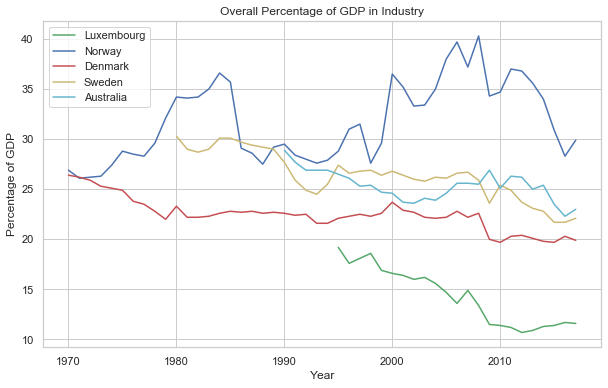

In [25]:
#Line Chart For GDP % Industry 1970-2017
def gdp_industry_line_chart():
    
    sns.set(style="whitegrid")
    year = list(range(1960, 2018))
    lu_gdp = lu['gdp']
    no_gdp = no['gdp']
    dk_gdp = dk['gdp']
    se_gdp = se['gdp']
    au_gdp = au['gdp']

    plt.plot(year, lu_gdp, color='g', label='Luxembourg')
    plt.plot(year, no_gdp, color='b', label='Norway')
    plt.plot(year, dk_gdp, color='r', label='Denmark')
    plt.plot(year, se_gdp, color='y', label='Sweden')
    plt.plot(year, au_gdp, color='c', label='Australia')

    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Percentage of GDP')
    plt.title('Overall Percentage of GDP in Industry')
    return plt.show()

gdp_industry_line_chart()

<font color=#303F9F>Lets take a look at Norway based on a box plot. The reason for doing this is because we have extensive data. It is also interesting that from 1970 to 2017 Norway has increased as an industrial nation. All other nations have been on the decline.</font>

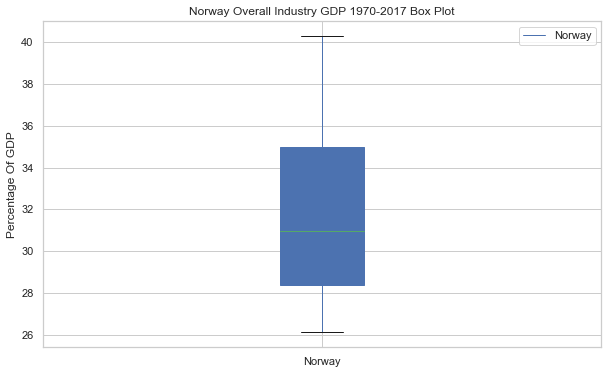

In [26]:
def gdp_percent_industry_norway_box():
    
    #lu.plot.box(x= 'year', y= 'gdp', title= 'Luxembourg Industry GDP Box Plot');
    no.plot.box(x= 'year', y= 'gdp', title= 'Norway Overall Industry GDP 1970-2017 Box Plot',patch_artist=True, label='Norway')
    plt.legend(no.country.iloc[0:1])
    plt.ylabel('Percentage Of GDP')
    return plt.show()
    #dk.plot.box(x= 'year', y= 'gdp', title= 'Denmark Industry GDP Box Plot');
    #se.plot.box(x= 'year', y= 'gdp', title= 'Sweden Industry GDP Box Plot');
    #au.plot.box(x= 'year', y= 'gdp', title= 'Australia Industry GDP Box Plot');
    
gdp_percent_industry_norway_box();

In [27]:
no.country.iloc[0:1]

125    Norway
Name: country, dtype: object